In [1]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3050 Laptop GPU


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
print('Using device:', device)

Using device: cuda


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

We could see there are 50,000 training images and 10,000 test images

In [7]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Plotting few Samples

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

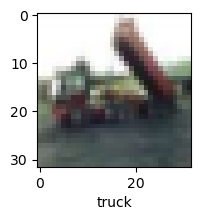

In [11]:
plot_sample(X_train, y_train, 2)

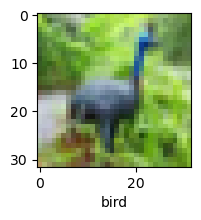

In [12]:
plot_sample(X_train, y_train, 6)

Normalizing the training data

In [13]:
X_train = X_train / 255
X_test = X_test / 255

CNN Model

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers. MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (6,6), activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    layers. MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation= 'softmax')
])
    

C:\Users\Siddharth Gupta\anaconda3\envs\gpu_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
## ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True)

In [16]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
cnn.fit(X_train, y_train,validation_split=0.20, epochs=20, batch_size=64, callbacks=[checkpoint])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.1827 - loss: 2.2587 - val_accuracy: 0.3890 - val_loss: 1.7149
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.2695 - loss: 1.8597 - val_accuracy: 0.4085 - val_loss: 1.6234
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.3104 - loss: 1.7487 - val_accuracy: 0.4210 - val_loss: 1.5444
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.4185 - loss: 1.5193 - val_accuracy: 0.5860 - val_loss: 1.2170
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.5242 - loss: 1.2607 - val_accuracy: 0.5850 - val_loss: 1.1576
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.6123 - loss: 1.0795 - val_accuracy: 0.6087 - val_loss: 1.1740
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.6628 - loss: 0.9574 - val_accuracy: 0.7127 - val_loss: 0.8159
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7114 - loss: 0.8170 - 

In [18]:
## Load the best model saved as 'best_model.keras'
best_model = load_model("best_model.keras")

In [19]:
y_pred = best_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = np.argmax(y_pred, axis=1)
score = accuracy_score(y_test,y_pred)

print(f"Accuracy: {score * 100:.2f}%")

Accuracy: 73.91%
